<a href="https://colab.research.google.com/github/jperezaracil/03MAIR-Algoritmos-de-Optimizacion-2021/blob/main/Jorge_P%C3%A9rez_Aracil_Algoritmos_AG2_Raul_Reyero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Jorge Pérez Aracil <br>
Link:   https://colab.research.google.com/drive/1Rlsmt5kVBU52mVZg13j-OLR7V89wkl9G#scrollTo=ta1tvzVvsKPC<br>
Github: https://github.com/jperezaracil/03MAIR-Algoritmos-de-Optimizacion-2021
<br>




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

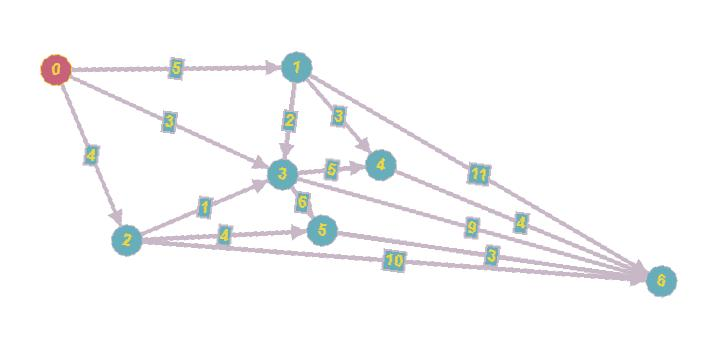

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
###############################################################################
def Floyd_Warshall(matriz_costes):
  n = len(matriz_costes)

  costes = matriz_costes.copy()

  nodos_padres = np.full([n,n],-1)
  
  for nodo_origen in range(n):
    for nodo_destino in range(n):
      if matriz_costes[nodo_origen][nodo_destino] != np.inf and \
      matriz_costes[nodo_origen][nodo_destino] != 0:
        nodos_padres[nodo_origen][nodo_destino] = nodo_origen
  

  for i in range(n):
    for j in range(n):
      for k in range(n):
        if costes[i][k] + costes[k][j] < costes[i][j]:
          costes[i][j] = costes[i][k] + costes[k][j]
          nodos_padres[i][j] = nodos_padres[k][j]
  
  return costes, nodos_padres

def obtener_ruta(costes, nodos_padre, origen, destino):
  siguiente_nodo = destino
  
  # Se inicializa la ruta con el nodo destino.
  ruta = [siguiente_nodo]

  while nodos_padre[origen][siguiente_nodo] != -1:
    siguiente_nodo = nodos_padre[origen][siguiente_nodo]
    ruta.append(siguiente_nodo)
  
  # Se invierte la lista con la ruta óptima para tenerla en el orden correcto.
  ruta.reverse()
  
  print(f"La ruta óptima del nodo {origen} al nodo {destino} es: {ruta}")
  print(f"Y el coste de dicha ruta es: {costes[origen][destino]}\n")

In [3]:
import numpy as np

matriz_costes = [[     0,      5,      4,      3, np.inf, np.inf, np.inf],
                 [np.inf,      0, np.inf,      2,      3, np.inf,     11],
                 [np.inf, np.inf,      0,      1, np.inf,      4,     10],
                 [np.inf, np.inf, np.inf,      0,      5,      6,      9],
                 [np.inf, np.inf, np.inf, np.inf,      0, np.inf,      4],
                 [np.inf, np.inf, np.inf, np.inf, np.inf,      0,      3],
                 [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf,      0]]

# Se obtienen la matriz con los costes totales de las rutas de cualquier nodo
# a cualquier otro, y la matriz que indica los nodos padre de cada nodo en
# cada ruta.
costes, nodos_padre = Floyd_Warshall(matriz_costes)

# Se imprime la matriz con los costes totales.
print("COSTES TOTALES:")
print("---------------\n")
for i in range(len(matriz_costes)):
  print(costes[i])

# Se imprime la matriz que indica los nodos padre de cada nodo en cada ruta.
print("\nNODOS PADRE")  
print("-------------\n")
for i in range(len(matriz_costes)):
  print(nodos_padre[i])

COSTES TOTALES:
---------------

[0, 5, 4, 3, 8, 8, 11]
[inf, 0, inf, 2, 3, 8, 7]
[inf, inf, 0, 1, 6, 4, 7]
[inf, inf, inf, 0, 5, 6, 9]
[inf, inf, inf, inf, 0, inf, 4]
[inf, inf, inf, inf, inf, 0, 3]
[inf, inf, inf, inf, inf, inf, 0]

NODOS PADRE
-------------

[-1  0  0  0  1  2  5]
[-1 -1 -1  1  1  3  4]
[-1 -1 -1  2  3  2  5]
[-1 -1 -1 -1  3  3  3]
[-1 -1 -1 -1 -1 -1  4]
[-1 -1 -1 -1 -1 -1  5]
[-1 -1 -1 -1 -1 -1 -1]


In [4]:
# Se obtiene la ruta y coste total concretando los nodos origen y destino.
obtener_ruta(costes, nodos_padre, 0, 6)

La ruta óptima del nodo 0 al nodo 6 es: [0, 2, 5, 6]
Y el coste de dicha ruta es: 11



##Fuerza bruta

In [5]:
import itertools
# Fuerza bruta
###############################################################################

# Cálculo del coste de una asignación.
def calcular_coste(asignacion, matriz_costes):
  coste = 0
  
  for i in range(len(asignacion)):
    coste += matriz_costes[i][asignacion[i]]
  
  return coste

# Algoritmo de fuerza bruta.
def fuerza_bruta(matriz_costes):
  mejor_solucion = ()
  mejor_coste = np.inf

  for s in list(itertools.permutations(range(len(matriz_costes)))):
    coste_tmp = calcular_coste(s, matriz_costes)

    if coste_tmp < mejor_coste:
      mejor_solucion = s
      mejor_coste = coste_tmp
  
  print("La mejor solución es", mejor_solucion, "con coste:", mejor_coste)
        

In [6]:
matriz_costes = [[11,12,18,40],
                 [14,15,13,22],
                 [11,17,19,23],
                 [17,14,20,28]]

fuerza_bruta(matriz_costes)

La mejor solución es (0, 2, 3, 1) con coste: 61


### Algoritmo de Ramificación y Poda

In [7]:
# Funciones auxiliares
###############################################################################

def calcular_coste(asignacion, matriz_costes):
  coste = 0
  
  for i in range(len(asignacion)):
    coste += matriz_costes[i][asignacion[i]]
  
  return coste

def CI(asignacion, matriz_costes):

  cota_inferior = calcular_coste(asignacion, matriz_costes)

  inicio = len(asignacion)
  fin = len(matriz_costes)
  
  for j in range(fin):
    if j not in asignacion:
      cota_inferior += min([matriz_costes[i][j] for i in range(inicio, fin)])
    
  return cota_inferior

def CS(asignacion, matriz_costes):

  cota_superior = calcular_coste(asignacion, matriz_costes)

  inicio = len(asignacion)
  fin = len(matriz_costes)
  
  for j in range(fin):
    if j not in asignacion:
      cota_superior += max([matriz_costes[i][j] for i in range(inicio, fin)])
    
  return cota_superior

def obtener_nodos_hijos(nodo, matriz_costes):
  hijos = []

  for i in range(len(matriz_costes)):
    if i not in nodo['asig']:
      nodo_hijo = nodo['asig'] + (i,)  
      hijos.append({'asig': nodo_hijo,
                    'ci': CI(nodo_hijo, matriz_costes),
                    'cs': CS(nodo_hijo, matriz_costes)})

  return hijos   

In [8]:
# Función principal de Ramificación y Poda
def ramificacion_y_poda(matriz_costes, minimizacion = True):

  num_tareas = len(matriz_costes)  

  asignacion_final = tuple(i for i in range(num_tareas))
  coste_final = calcular_coste(asignacion_final, matriz_costes)

  lista_nodos = [{'asig': (),
                  'ci': CI((), matriz_costes),
                  'cs': CS((), matriz_costes)}]
  
  while(len(lista_nodos) > 0):
    if minimizacion:
      nodo_padre = min(lista_nodos, key = lambda x: x['ci'])
    else:
      nodo_padre = max(lista_nodos, key = lambda x: x['cs'])
    
    # RAMIFICACIÓN
    ##############

    nodos_hijos = obtener_nodos_hijos(nodo_padre, matriz_costes)
    

    if len(nodos_hijos) == 1 and len(nodos_hijos[0]['asig']) == num_tareas:
      asignacion_actual = nodos_hijos[0]['asig']
      coste_actual = calcular_coste(asignacion_actual, matriz_costes)
      
      if minimizacion and coste_actual < coste_final or \
         not minimizacion and coste_actual > coste_final:
        asignacion_final = asignacion_actual
        coste_final = coste_actual
      
    else:
      # PODA
      ######

      if minimizacion:
        nodos_hijos = [x for x in nodos_hijos if x['ci'] < coste_final]
      else:
        nodos_hijos = [x for x in nodos_hijos if x['cs'] > coste_final]
      
      lista_nodos.extend(nodos_hijos)
      
  
    lista_nodos.remove(nodo_padre)
    
  print("La solución óptima para asignar", num_tareas, "tareas a", num_tareas, \
        "agentes es:", asignacion_final)
  print("Y el coste es:", coste_final)  

In [9]:

matriz_costes = [[11,12,18,40],
                 [14,15,13,22],
                 [11,17,19,23],
                 [17,14,20,28]]

ramificacion_y_poda(matriz_costes)

La solución óptima para asignar 4 tareas a 4 agentes es: (0, 2, 3, 1)
Y el coste es: 61


## Descenso del gradiente

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

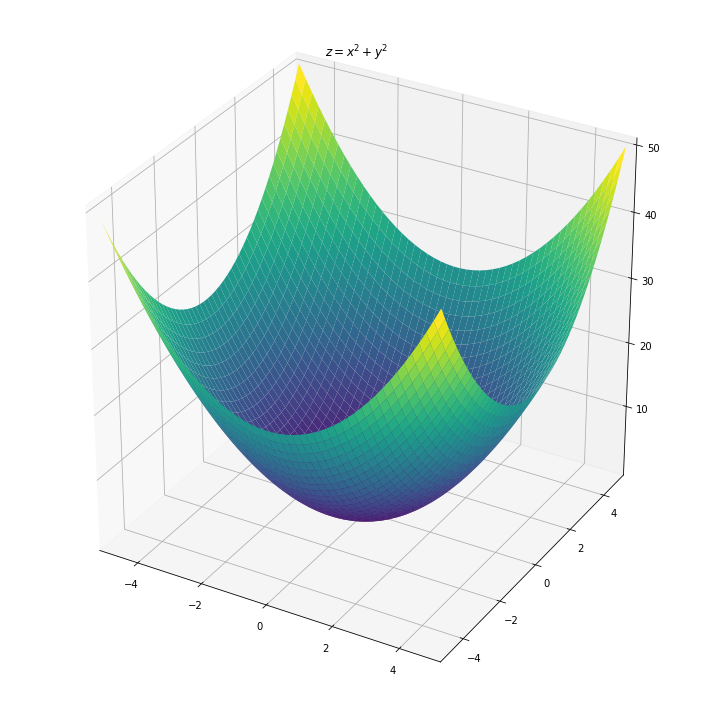

In [10]:
from sympy import symbols
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
import numpy as np

x,y = symbols('x y')
plot3d(x**2 + y**2, (x,-5,5), (y,-5,5), title='$z = x^2 + y^2$', size=(10,10))

In [11]:
def gradient_descent(resolucion, rango, num_iter, TA):
  # Se guardan los valores de los ejes X, Y y Z para dibujar un mapa de niveles.
  X = np.linspace(-rango,rango,resolucion)
  Y = np.linspace(-rango,rango,resolucion)
  Z = np.zeros([resolucion,resolucion])
  
  for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
      Z[ix,iy] = f([x,y])
  
  # Se pinta el mapa de niveles.
  plt.contourf(X,Y,Z,resolucion)
  plt.colorbar()
  
  # Generamos un punto aleatorio inicial y lo pintamos de blanco en el gráfico.
  P = np.random.uniform(-2.5, 2.5, 2)
  plt.plot(P[0], P[1], "o", c = "white")
  
  # Se aplica el algoritmo de descenso del gradiente, pintando en rojo los
  # puntos de cada iteración.
  for _ in range(num_iter):
    grad = np.array(df(P))
    P -= TA * grad
    plt.plot(P[0], P[1], "o", c = "red")
  
  plt.plot(P[0], P[1], "o", c = "green")
  plt.show()
  
  print("El mínimo se encuentra en:", np.round(P,3), "y el valor de la función en\
  dicho punto es:", np.round(f(P),3))

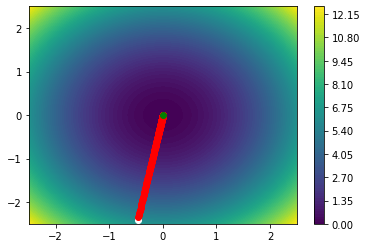

El mínimo se encuentra en: [-0. -0.] y el valor de la función en  dicho punto es: 0.0


In [12]:
f = lambda x: x[0]**2 + x[1]**2
df = lambda x: [2*x[0], 2*x[1]]


gradient_descent(100, 2.5, 500, 0.01)

Ejercicio extra:

# Generar matrices con valores aleatorios de mayores dimensiones


In [13]:
import numpy as np

def matrix(dim):
  M = np.zeros((dim, dim))
  for i in range(dim):
    for j in range(dim):
      M[i, j] = np.random.randint(10, 50)
  return M




# Comparativa

Fuerza Bruta vs Ramificación y Poda

In [14]:
#Dim 10
M = matrix(10)
fuerza_bruta(M)
ramificacion_y_poda(M)


La mejor solución es (5, 0, 7, 2, 9, 8, 1, 4, 6, 3) con coste: 174.0
La solución óptima para asignar 10 tareas a 10 agentes es: (9, 0, 7, 2, 8, 5, 1, 4, 6, 3)
Y el coste es: 174.0


Encontramos problemas de memoria a partir de 15 x 15

**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

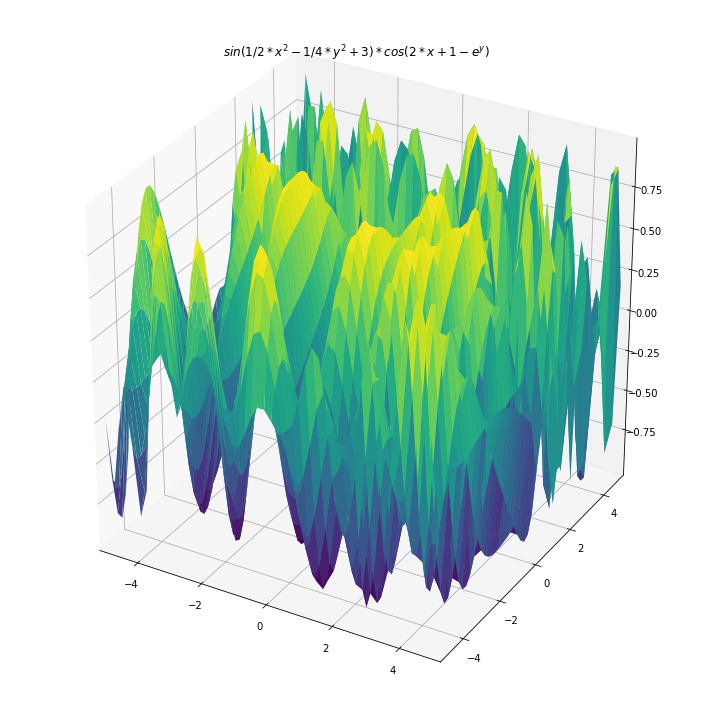

In [27]:
import sympy as sym
x = sym.Symbol('x')
y = sym.Symbol('y')
f = sym.sin(1/2 * x**2 + 1/4 * y**2 + 3)*sym.cos(2*x + 1 - sym.exp(y))

plot3d(f, (x,-5,5), (y,-5,5), title='$sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$', size=(10,10))

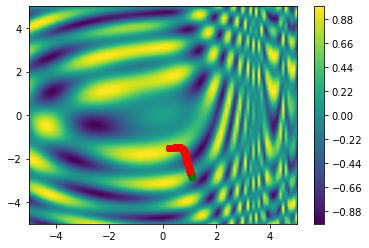

El mínimo se encuentra en: [ 1.1   -2.852] y el valor de la función en  dicho punto es: 0.601


In [17]:
import math 
f = lambda x: math.sin(1/2 * x[0]**2 + 1/4 * x[1]**2 + 3)*math.cos(2*x[0] + 1 - math.exp(x[1]))
df = lambda x: [x[0] * math.cos(2*x[0] - math.exp(x[1]) + 1) * math.cos(x[0]**2/2 - x[1]**2/4 + 3) - 2*math.sin(2*x[0] - math.exp(x[1])+ 1) * math.sin(x[0]**2 / 2 - x[1]**2 /4 +3),
math.exp(x[1]) * math.sin(2*x[0] - math.exp(x[1]) + 1) * math.cos(x[0]**2/2 - x[1]**2/4 + 3) - 1/2*x[1]*math.cos(2*x[0] - math.exp(x[1]) + 1) * math.cos(x[0]**2 / 2 - x[1]**2 /4 +3)]

gradient_descent(100, 5, 10**5, 0.001)